<a href="https://colab.research.google.com/github/Ruthuvikas/Transformer/blob/main/self_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Self Attention

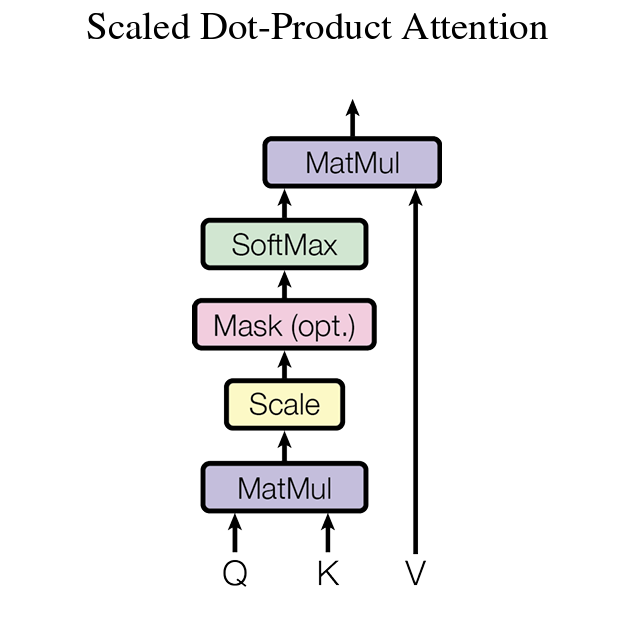

In [24]:
import torch
import math

# Set the random seed for reproducibility
torch.manual_seed(1337)

# Define parameters
sequence_length = 5
embedding_dim = 512

# Input tensor representing sequences (e.g., batch size 1 with sequence_length embeddings)
X = torch.rand((sequence_length, embedding_dim))  # Shape: (5, 512)

# Initialize weights for query, key, value projections
Wq = torch.rand((embedding_dim, embedding_dim))  # Shape: (512, 512)
Wk = torch.rand((embedding_dim, embedding_dim))
Wv = torch.rand((embedding_dim, embedding_dim))

# Project input embeddings into queries (q), keys (k), and values (v)
q = X @ Wq  # Shape: (sequence_length, embedding_dim)
k = X @ Wk  # Shape: (sequence_length, embedding_dim)
v = X @ Wv  # Shape: (sequence_length, embedding_dim)

# Compute scaled dot product attention scores
attention_scores = (q @ k.T) / math.sqrt(embedding_dim)  # Shape: (sequence_length, sequence_length)

# Apply softmax to compute attention weights over the sequence
attention_weights = torch.softmax(attention_scores, dim=1)  # Shape: (sequence_length, sequence_length)

# Compute the weighted sum of the value vectors
output = attention_weights @ v  # Shape: (sequence_length, embedding_dim)

# Output the computed shapes for debugging/validation
print("Attention Scores Shape:", attention_scores.shape)
print("Attention Weights Shape:", attention_weights.shape)
print("Attention Output Shape:", output.shape)


Attention Scores Shape: torch.Size([5, 5])
Attention Weights Shape: torch.Size([5, 5])
Attention Output Shape: torch.Size([5, 512])


Multi-head attention

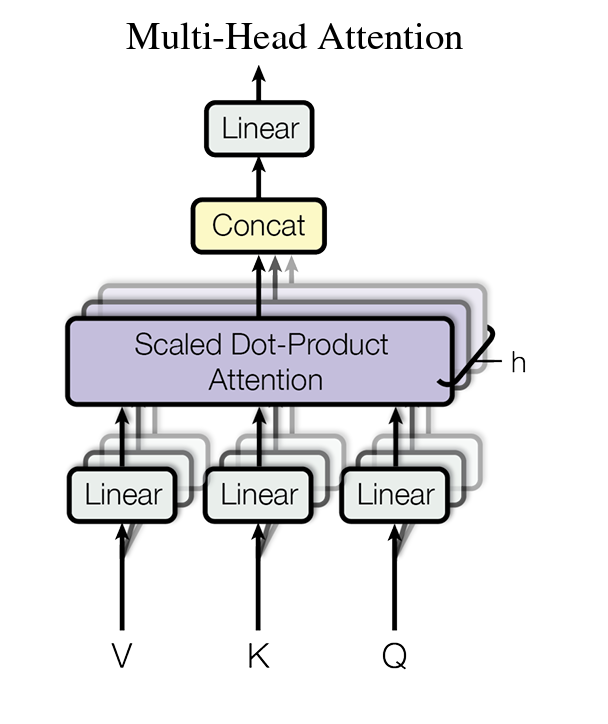

In [25]:
import torch
import math

# Set random seed for reproducibility
torch.manual_seed(1337)

# Define parameters
batch_size = 2
sequence_length = 5
embedding_dim = 512
heads = 2
head_dim = embedding_dim // heads  # Split embedding dimension into multiple heads

# Input tensor X
X = torch.rand((batch_size, sequence_length, embedding_dim))  # Shape: (batch_size, sequence_length, embedding_dim)

# Random weight matrices for projection into multi-head query, key, and value
Wq = torch.rand((embedding_dim, heads * head_dim))  # Shape: (512, 512)
Wk = torch.rand((embedding_dim, heads * head_dim))
Wv = torch.rand((embedding_dim, heads * head_dim))

# Project input into queries, keys, and values for all attention heads
q = X @ Wq  # Shape: (batch_size, sequence_length, heads * head_dim)
k = X @ Wk  # Shape: (batch_size, sequence_length, heads * head_dim)
v = X @ Wv  # Shape: (batch_size, sequence_length, heads * head_dim)

# Reshape to separate individual attention heads
q = q.view(batch_size, sequence_length, heads, head_dim)  # Shape: (batch_size, sequence_length, heads, head_dim)
k = k.view(batch_size, sequence_length, heads, head_dim)
v = v.view(batch_size, sequence_length, heads, head_dim)

# Transpose to compute dot products across heads
q = q.transpose(1, 2)  # Shape: (batch_size, heads, sequence_length, head_dim)
k = k.transpose(1, 2)  # Shape: (batch_size, heads, sequence_length, head_dim)
v = v.transpose(1, 2)  # Shape: (batch_size, heads, sequence_length, head_dim)

# Compute attention scores
attention_scores = (q @ k.transpose(-2, -1)) / math.sqrt(head_dim)  # Shape: (batch_size, heads, sequence_length, sequence_length)

# Apply softmax
attention_weights = torch.softmax(attention_scores, dim=-1)  # Shape: (batch_size, heads, sequence_length, sequence_length)

# Weighted sum over the value vectors
output = attention_weights @ v  # Shape: (batch_size, heads, sequence_length, head_dim)

# Reshape to combine all attention heads back
output = output.transpose(1, 2).contiguous().view(batch_size, sequence_length, embedding_dim)  # Shape: (batch_size, sequence_length, embedding_dim)

# Print the shapes
print("Attention Scores Shape:", attention_scores.shape)  # (2, 2, 5, 5)
print("Attention Weights Shape:", attention_weights.shape)  # (2, 2, 5, 5)
print("Output Shape:", output.shape)  # (2, 5, 512)


Attention Scores Shape: torch.Size([2, 2, 5, 5])
Attention Weights Shape: torch.Size([2, 2, 5, 5])
Output Shape: torch.Size([2, 5, 512])


Feed Forward Layer

---

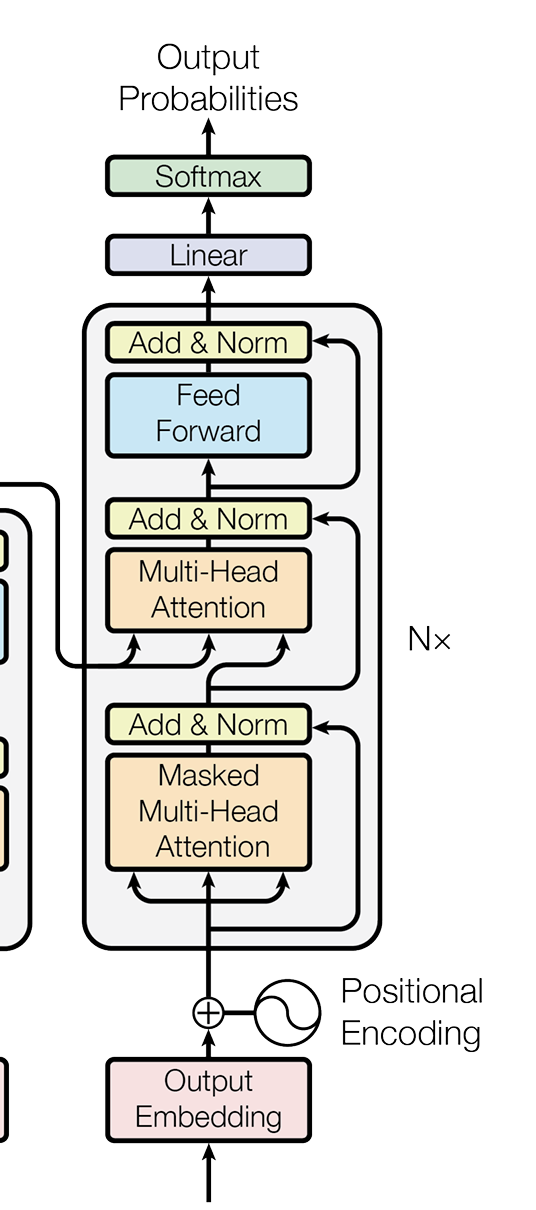

In [28]:
import torch.nn

class FeedForward(torch.nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super(FeedForward, self).__init__()
        self.fc1 = torch.nn.Linear(embedding_dim, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, embedding_dim)
        self.dropout = torch.nn.Dropout(0.1)
        self.activation = torch.nn.ReLU()
        self.norm = torch.nn.LayerNorm(embedding_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.norm(x)
        return x

In [29]:
embedding_dim = 512
hidden_dim = 2048

input_tensor = torch.rand((batch_size, sequence_length, embedding_dim))  # Shape: (batch_size, sequence_length, embedding_dim)
feed_forward = FeedForward(embedding_dim, hidden_dim)
output = feed_forward.forward(input_tensor)
print(output.shape)

torch.Size([2, 5, 512])
